In [0]:
# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
# import datasets 
train_labels = pd.read_csv("datasets/train_labels.csv", delimiter=",", header=0, index_col=0)
train_images = np.load("datasets/train_images.npy", encoding="latin1")
test_images = np.load("datasets/train_images.npy", encoding="latin1")

In [0]:
# store copies, may wish to retrieve original datasets
copy_train_labels = np.copy(train_labels)
copy_train_images = np.copy(train_images)
copy_test_images = np.copy(test_images)
 
# restore original datasets
def restore():
    train_labels = np.copy(copy_train_labels)
    train_images = np.copy(copy_train_images)
    test_images = np.copy(copy_test_images)
    return train_labels, train_images, test_images

In [14]:
# check shape
print(train_labels.shape)
print(train_images.shape)
print(test_images.shape)

(10000, 1)
(10000, 2)
(10000, 2)


In [0]:
# RUN FROM| FROM HERE IF DATASETS NEED TO BE RESTORED
train_labels, train_images, test_images = restore()

In [0]:
# reshape labels to 1d array, encode labels to integers
train_labels = np.array(train_labels).reshape(-1)
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_y = le.transform(train_labels)

In [17]:
# check labels
print(train_labels)
print(train_y)

['shovel' 'rifle' 'scorpion' ... 'rollerskates' 'mouth' 'pencil']
[25 20 23 ... 21  3 13]


In [0]:
# reshape images
#train_images = train_images[:,1].reshape(-1, 100, 100)
train_x = []
for i in train_images[:,1]:
    train_x.append(i.reshape(100,100))
train_x = np.array(train_x, dtype=float) 

In [19]:
# check shape
print(train_x.shape)

(10000, 100, 100)


# Noise Reduction

In [20]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

Using TensorFlow backend.


In [0]:
def make_convolutional_autoencoder():
    # encoding
    inputs = Input(shape=(100, 100, 1))
    x = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = MaxPooling2D(padding='same')(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    encoded = MaxPooling2D(padding='same')(x)    
    
    # decoding
    x = Conv2D( 8, 3, activation='relu', padding='same')(encoded)
    x = UpSampling2D()(x)
    x = Conv2D( 8, 3, activation='relu', padding='same')(x)
    x = UpSampling2D()(x)
    x = Conv2D(16, 3, activation='relu')(x) # <= padding='valid'!
    x = UpSampling2D()(x)
    decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)    
    
    # autoencoder
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

322
322


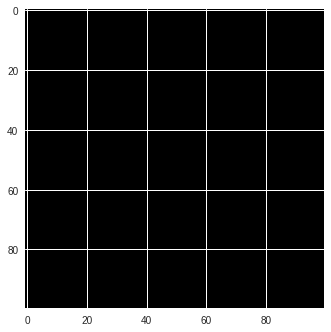

In [25]:
empty_labels = pd.read_csv("datasets/empty.csv", delimiter=",")
#print(empty_labels)
empty_labels =np.array(empty_labels)
empty_x = []
for n in empty_labels[:, 0]:
    empty_x.append(train_x[n])
# print(len(empty_x))
plt.imshow(empty_x[321], cmap='gray')

black_x = []
black = np.zeros((100, 100))
for n in range(322):
    black_x.append(black)
# print(len(black_x))
plt.imshow(black_x[321], cmap='gray')

In [0]:
empty_x=np.asarray(empty_x)

In [0]:
black_x = np.asarray(black_x)

In [0]:
empty_temp = empty_x.reshape(-1,100,100,1)
black_temp = black_x.reshape(-1,100,100,1)

In [37]:
temp.shape

(322, 100, 100, 1)

In [42]:

autoencoder = make_convolutional_autoencoder()
autoencoder.fit(empty_temp, black_temp, 
                epochs=8, 
                batch_size=322)

Epoch 1/8
322/322 [==============================] - 6s 18ms/step - loss: 5.0374
Epoch 2/8
322/322 [==============================] - 5s 16ms/step - loss: 2.3414
Epoch 3/8
322/322 [==============================] - 5s 16ms/step - loss: 1.0992
Epoch 4/8
322/322 [==============================] - 5s 16ms/step - loss: 0.4549
Epoch 5/8
322/322 [==============================] - 5s 16ms/step - loss: 0.1731
Epoch 6/8
322/322 [==============================] - 5s 16ms/step - loss: 0.0705
Epoch 7/8
322/322 [==============================] - 5s 16ms/step - loss: 0.0336
Epoch 8/8
322/322 [==============================] - 5s 16ms/step - loss: 0.0186


In [0]:
temp_train = train_x[:3].reshape(-1,100,100,1)

In [49]:
temp_train.shape

(3, 100, 100, 1)

In [0]:
train_x_decoded = autoencoder.predict(temp_train)

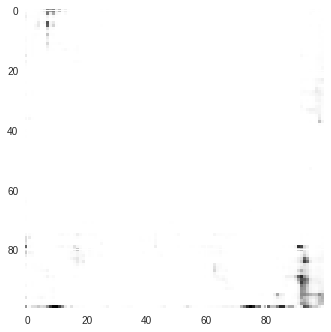

In [54]:
plt.imshow(train_x_decoded[2].reshape(100,100))
plt.show()

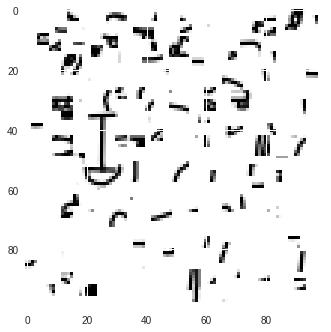

In [55]:
plt.imshow(train_x[0])
plt.show()